**Homework 7 and 8**

Name:

NetID:

**Task**

In this homework you have only a single task, you're going to be implementing a simple neural network from "scratch" in numpy to classify the moons and circles datasets.

The first codeblock contains the helper functions from Homework 05 which we'll be reusing to compare our neural network to the SVMs.

Good luck!

Linear SVM Accuracy on Circles: 0.30
Polynomial SVM Accuracy on Circles: 0.30
RBF SVM Accuracy on Circles: 1.00


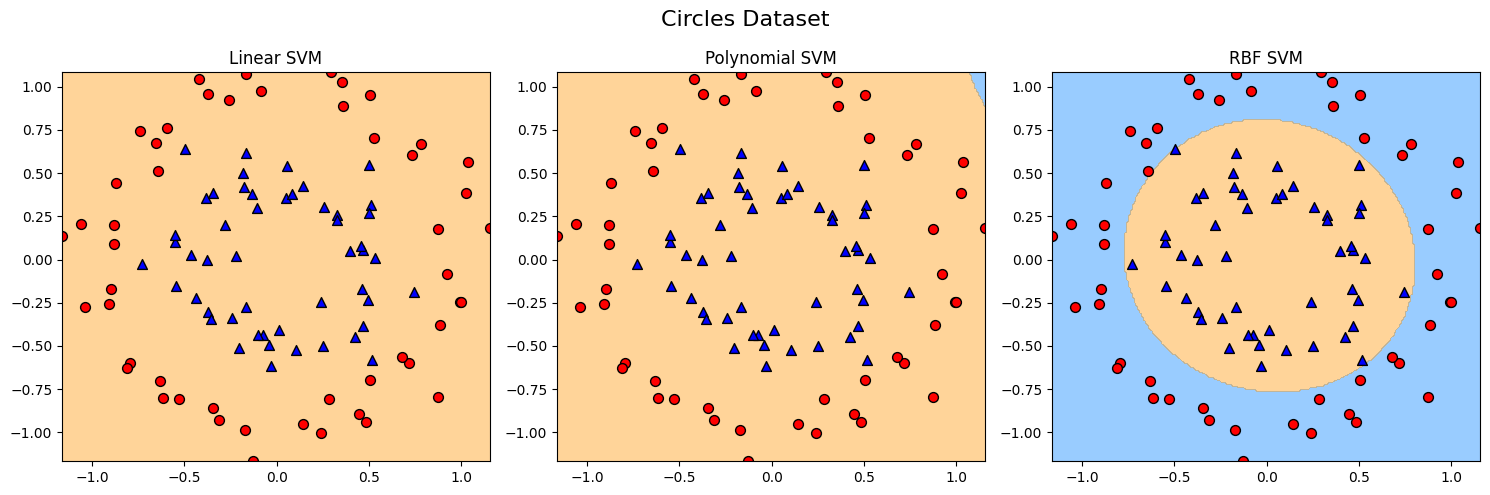

Linear SVM Accuracy on Moons: 1.00
Polynomial SVM Accuracy on Moons: 0.95
RBF SVM Accuracy on Moons: 1.00


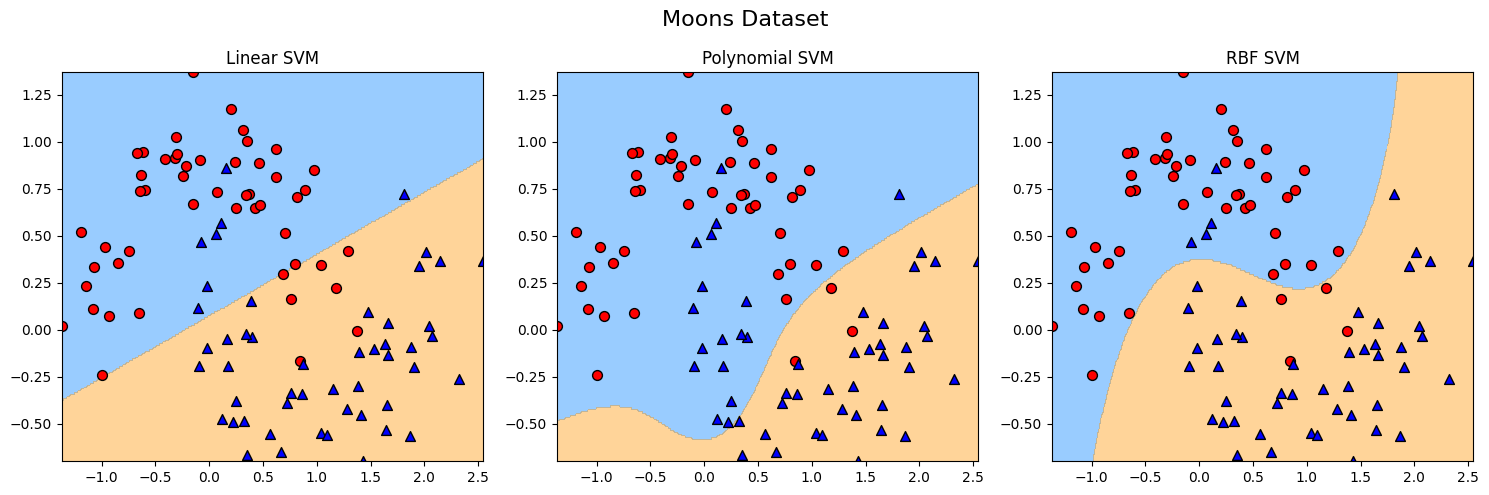

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_moons, make_circles

# Plot decision boundary for each classifier
def plot_decision_boundary(clf, X, y, ax):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict class for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    ax.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], alpha=0.4, cmap='jet')  # Two levels for binary classification

    # Plot points for each class with different markers
    markers = ['o', '^', '*']  # Define different markers (e.g., 'o' for class 0, 's' for class 1)
    colors = ['red', 'blue', 'green']
    
    for idx, class_value in enumerate(np.unique(y)):
        ax.scatter(X[y == class_value, 0], X[y == class_value, 1],
                   c=colors[idx], marker=markers[idx], label=f'Class {class_value}',
                   edgecolor='k', s=50)

    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())

# Function to fit classifiers, show accuracy and plot decision boundaries
def fit_and_plot(X, y, dataset_name, classifiers):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'{dataset_name} Dataset', fontsize=16)
    
    for idx, (name, clf) in enumerate(classifiers.items()):
        # Fit the classifier
        clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f'{name} Accuracy on {dataset_name}: {accuracy:.2f}')
        
        # Plot decision boundary
        axs[idx].set_title(name)
        plot_decision_boundary(clf, X, y, axs[idx])
    
    plt.tight_layout()
    plt.show()

# Create SVM classifiers with different kernels
classifiers = {
    'Linear SVM': SVC(kernel='linear'),
    'Polynomial SVM': SVC(kernel='poly', degree=3, gamma='auto'),
    'RBF SVM': SVC(kernel='rbf', gamma='auto')
}
# Generate and fit to make_circles dataset
X_circles, y_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42)
fit_and_plot(X_circles, y_circles, "Circles", classifiers)
# Generate and fit to make_moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=42)
fit_and_plot(X_moons, y_moons, "Moons", classifiers)

**Neural Network from Scratch**

We can do better than some SVMs using even very simple neural networks. Your task is to implement a simple neural network from scratch in numpy to classify the moons and circles datasets, following the architecture shown below.

![sneed](https://raw.githubusercontent.com/SkalskiP/ILearnDeepLearning.py/e300c61fc39e480bad8d4d83616e763334b74ec7/01_mysteries_of_neural_networks/03_numpy_neural_net/supporting_visualizations/nn_architecture.png)

Just to break this down a little more, what we have is a network with six layers. Our first layer, the input layer, takes in the X and Y values of a given point. Our final layer, the output layer, returns a 0 or a 1, indicating which class the point belongs to. 

We will use the ReLU activation function for our hidden layers, and a sigmoid function for our output layer.

In order to actually implement a training regime for our network, we'll need to specify a loss function that we can use to measure how well our network is doing. We'll use the binary cross entropy loss function as we're attempting a binary classification task.

![Binary Cross Entropy Loss](https://pbs.twimg.com/media/FBmVmdHWQAAU7gq.png)

Training our network will consist of two steps primarily, forward propagation and back propagation.

Forward propagation is the process of taking our input data, and passing it through the network to get a prediction.

Back propagation is the process of taking the derivative of the loss function with respect to the weights and biases, and using gradient descent to update the weights and biases.

![NN Training](https://raw.githubusercontent.com/SkalskiP/ILearnDeepLearning.py/e300c61fc39e480bad8d4d83616e763334b74ec7/01_mysteries_of_neural_networks/03_numpy_neural_net/supporting_visualizations/blueprint.gif)

In this gif we can see a brief outline of the forward and backward propagation steps.

Broadly speaking, forward is what gives us our prediction, and backward is what gives us the gradient of the loss function with respect to the weights and biases, and is how we update the weights to get closer to the right answer (done by minimizing the loss function).

We'll also need to implement a couple activation functions and their derivatives.

We're going to be using the ReLU activation function for our hidden layers, and a sigmoid function for our output layer. The sigmoid will allow us to map our output to a probability between 0 and 1 and from there to a class based on a decision threshold.

![Activation Functions](https://raw.githubusercontent.com/SkalskiP/ILearnDeepLearning.py/e300c61fc39e480bad8d4d83616e763334b74ec7/01_mysteries_of_neural_networks/03_numpy_neural_net/supporting_visualizations/activations.gif)

Here we can see both activation functions and their derivatives.

The part that most people find tricky about this is the backpropagation step.

As we've seen in class for "single layer" examples, to optimize the weights of a model using gradient descent, we can rewrite the loss function in terms of the weights and then take partial derivatives with respect to each weight.

![Gradient Descent](https://global.discourse-cdn.com/dlai/original/3X/f/5/f58df86a4c92695569d9536d7e752161cd0f98fb.jpeg)

Will multilayer networks, how do we take the derivative of the loss function with respect to the weights, if the weights in the previous layer are reliant on the weights in the layer before them?

Backpropagation is the solution to this and revolves around using the chain rule to take essentially a series of partial derivatives backwards through the network to get the gradient of the loss function with respect to the weights at each layer. We can then redistribute these gradients to update the weights of the network.

![Backprop](https://miro.medium.com/v2/resize:fit:1200/0*9lo2ux8ASvt6YJkH.gif)

**BETTER TEACHING**

To be honest, your best bet is to watch the youtube videos by 3Blue1Brown. He's an incredible teacher and will do a better job than I can, along with better visualizations.

[![Introduction to Neural Networks](https://img.youtube.com/vi/aircAruvnKk/0.jpg)](https://www.youtube.com/watch?v=aircAruvnKk)

This is an introduction to neural networks using the MNIST dataset!

Then we have a great video on gradient descent.

[![Gradient Descent](https://img.youtube.com/vi/IHZwWFHWa-w/0.jpg)](https://www.youtube.com/watch?v=IHZwWFHWa-w)

Finally I'd recommend at least his first video on backpropagation, though you should probably watch the second too.

[![Backprop](https://img.youtube.com/vi/Ilg3gGewQ5U/0.jpg)](https://www.youtube.com/watch?v=Ilg3gGewQ5U)


In [43]:
import numpy as np

class NumpyNeuralNetwork:
    # Here we define the number and types of layers in our network
    # we also include their activation functions
    NN_ARCHITECTURE = [
        {"input_dim": 2, "output_dim": 25, "activation": "relu"},
        {"input_dim": 25, "output_dim": 50, "activation": "relu"},
        {"input_dim": 50, "output_dim": 50, "activation": "relu"},
        {"input_dim": 50, "output_dim": 25, "activation": "relu"},
        {"input_dim": 25, "output_dim": 1, "activation": "sigmoid"},
    ]

    # Our init function just initializes the weights and biases for each layer
    def __init__(self, seed = 99):
        # random seed initiation
        np.random.seed(seed)

        # parameters storage initiation
        self.params_values = {}
        
        # iteration over network layers
        for idx, layer in enumerate(self.NN_ARCHITECTURE):
            # we number network layers from 1
            layer_idx = idx + 1
            
            # extracting the number of units in layers
            layer_input_size = layer["input_dim"]
            layer_output_size = layer["output_dim"]
            
            # initiating the values of the W matrix
            # and vector b for subsequent layers
            self.params_values['W' + str(layer_idx)] = np.random.randn(
                layer_output_size, layer_input_size) * 0.1
            self.params_values['b' + str(layer_idx)] = np.random.randn(
                layer_output_size, 1) * 0.1
            
    def get_params_values(self):
        return self.params_values

    # TODO: Write the sigmoid function
    def sigmoid(self, Z):
        return None

    # TODO: Write the sigmoid_backward function
    # We need to partially differentiate the sigmoid function with respect to Z
    # We need this so we can update the weights and biases in our network
    # during backpropagation
    def sigmoid_backward(self, dA, Z):
        return None

    # TODO: Write the relu function
    def relu(self, Z):
        return None

    # TODO: Write the relu_backward function
    # We need to partially differentiate the relu function with respect to Z
    # We need this so we can update the weights and biases in our network
    # during backpropagation
    def relu_backward(self, dA, Z):
        return None

    # TODO: Finish the single_layer_forward_propagation function
    # This function is used to calculate the activation of a single layer
    # given the previous layer's activation, the weights, and the biases
    def single_layer_forward_propagation(self, A_prev, W_curr, b_curr, activation="relu"):
        # TODO: calculation of the input value for the activation function
        # remember, this looks super similar to the perceptron equation!
        Z_curr = None
        
        # selection of activation function
        if activation == "relu":
            activation_func = self.relu
        elif activation == "sigmoid":
            activation_func = self.sigmoid
        else:
            raise Exception('Non-supported activation function')
            
        # TODO: return of calculated activation A and the intermediate Z matrix
        return None

    # TODO: Finish the full_forward_propagation function
    # This function is used to calculate the activation of each layer in the network
    # given the input X
    def full_forward_propagation(self, X):
        # creating a temporary memory to store the information needed for a backward step
        memory = {}
        # X vector is the activation for layer 0 
        A_curr = X
        
        # iteration over network layers
        for idx, layer in enumerate(self.NN_ARCHITECTURE):
            # we number network layers from 1
            layer_idx = idx + 1
            # transfer the activation from the previous iteration
            A_prev = A_curr
            
            # TODO: extraction of the activation function for the current layer
            activ_function_curr = None
            # TODO: extraction of W for the current layer
            W_curr = None
            # TODO: extraction of b for the current layer
            b_curr = None
            # TODO: calculation of activation for the current layer
            A_curr, Z_curr = None
            
            # saving calculated values in the memory
            memory["A" + str(idx)] = A_prev
            memory["Z" + str(layer_idx)] = Z_curr
        
        # return of prediction vector and a dictionary containing intermediate values
        return A_curr, memory

    def get_cost_value(self, Y_hat, Y):
        # number of examples
        m = Y_hat.shape[1]

        # calculation of the cost according to the formula
        cost = -1 / m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
        return np.squeeze(cost)

    # TODO: Write the convert_prob_into_class function
    # We get from the sigmoid function a probability for each class
    # This function converts these probabilities into a 0 or 1 for each class
    def convert_prob_into_class(self, probs):
        probs_ = np.copy(probs)
        pass

        return probs_.flatten()

    def get_accuracy_value(self, Y_hat, Y):
        Y_hat_ = self.convert_prob_into_class(Y_hat)
        return (Y_hat_ == Y).all(axis=0).mean()

    # TODO: Write the single_layer_backward_propagation function
    # This function is used to calculate the gradient of the cost function with respect to the weights and biases
    # We need this so we can update the weights and biases in our network
    # during backpropagation
    def single_layer_backward_propagation(self, dA_curr, W_curr, b_curr, Z_curr, A_prev, activation="relu"):
        # number of examples
        m = A_prev.shape[1]
        
        # selection of activation function
        if activation == "relu":
            backward_activation_func = self.relu_backward
        elif activation == "sigmoid":
            backward_activation_func = self.sigmoid_backward
        else:
            raise Exception('Non-supported activation function')
        
        # TODO: calculation of the activation function derivative
        dZ_curr = None
        # TODO: derivative of the matrix W
        dW_curr = None
        # TODO: derivative of the vector b
        db_curr = None
        # TODO: derivative of the matrix A_prev
        dA_prev = None

        return dA_prev, dW_curr, db_curr

    # TODO: Finish the full_backward_propagation function
    # This function is used to calculate the gradients of the cost function with respect to the weights and biases
    def full_backward_propagation(self, Y_hat, Y, memory):
        grads_values = {}
        
        # number of examples
        m = Y.shape[1]
        # a hack ensuring the same shape of the prediction vector and labels vector
        Y = Y.reshape(Y_hat.shape)
        
        # TODO: initiation of gradient descent algorithm
        dA_prev = None
        
        # iteration over network layers
        for layer_idx_prev, layer in reversed(list(enumerate(self.NN_ARCHITECTURE))):
            # we number network layers from 1
            layer_idx_curr = layer_idx_prev + 1

            # extraction of the activation function for the current layer
            activ_function_curr = layer["activation"]
            
            dA_curr = dA_prev
            
            # We get the activation from the previous layer and the Z matrix from the current layer
            A_prev = memory["A" + str(layer_idx_prev)]
            Z_curr = memory["Z" + str(layer_idx_curr)]
            
            # We get the weights and biases for the current layer
            W_curr = self.params_values["W" + str(layer_idx_curr)]
            b_curr = self.params_values["b" + str(layer_idx_curr)]
            
            # TODO: calculate the gradients of the cost function with respect to the weights and biases
            dA_prev, dW_curr, db_curr = None
            
            # We save the gradients of the cost function with respect to the weights and biases
            grads_values["dW" + str(layer_idx_curr)] = dW_curr
            grads_values["db" + str(layer_idx_curr)] = db_curr
        
        return grads_values

    # This function is used to update the weights and biases in our network
    # during gradient descent
    def update(self, grads_values):

        # iteration over network layers
        for layer_idx, layer in enumerate(self.NN_ARCHITECTURE, 1):
            self.params_values["W" + str(layer_idx)] -= self.learning_rate * grads_values["dW" + str(layer_idx)]        
            self.params_values["b" + str(layer_idx)] -= self.learning_rate * grads_values["db" + str(layer_idx)]

        return self.params_values

    # TODO: Finish the train function
    # This function is used to train the network
    def train(self, X, Y, epochs, learning_rate, verbose=False):
        # initiation of lists storing the history 
        # of metrics calculated during the learning process 
        cost_history = []
        accuracy_history = []

        self.learning_rate = learning_rate
        
        # TODO: performing calculations for all epochs
        for i in range(epochs):
            # TODO: step forward
            Y_hat, cash = None
            
            # calculating metrics and saving them in history
            cost = self.get_cost_value(Y_hat, Y)
            cost_history.append(cost)
            accuracy = self.get_accuracy_value(Y_hat, Y)
            accuracy_history.append(accuracy)
            
            # TODO: step backward - calculating gradient
            grads_values = None
            # TODO: updating model state
            self.params_values = None
            
            if(i % 1000 == 0):
                if(verbose):
                    print("Iteration: {:05} - cost: {:.5f} - accuracy: {:.5f}".format(i, cost, accuracy))
                
        return self.params_values

    # Defining two helper functions to be backwards compatible with the previous homework
    def predict(self, X):
        Y_hat, _ = self.full_forward_propagation(np.transpose(X))
        return self.convert_prob_into_class(Y_hat)

    def fit(self, X, y):
        self.train(np.transpose(X), np.transpose(y.reshape((y.shape[0], 1))), 10000, 0.1)


**Run your neural network!**

Run the next code block to see how your network performs compared to the SVMs.

Polynomial SVM Accuracy on Circles: 0.45
RBF SVM Accuracy on Circles: 0.88
Numpy Neural Network Accuracy on Circles: 0.85


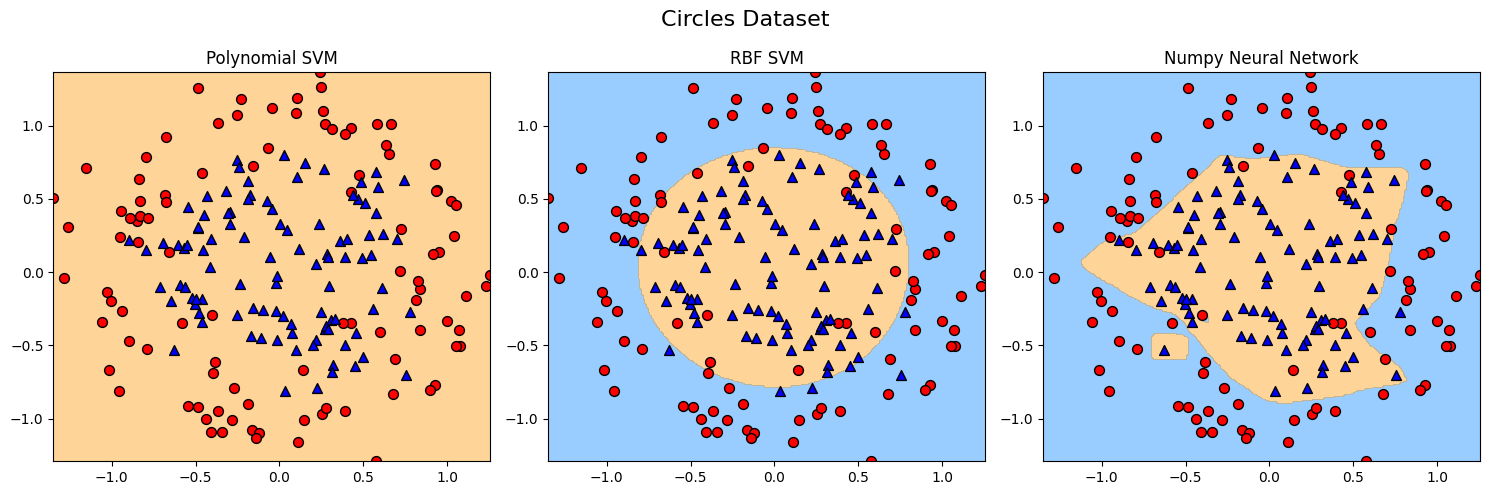

Polynomial SVM Accuracy on Moons: 0.80
RBF SVM Accuracy on Moons: 0.93
Numpy Neural Network Accuracy on Moons: 0.93


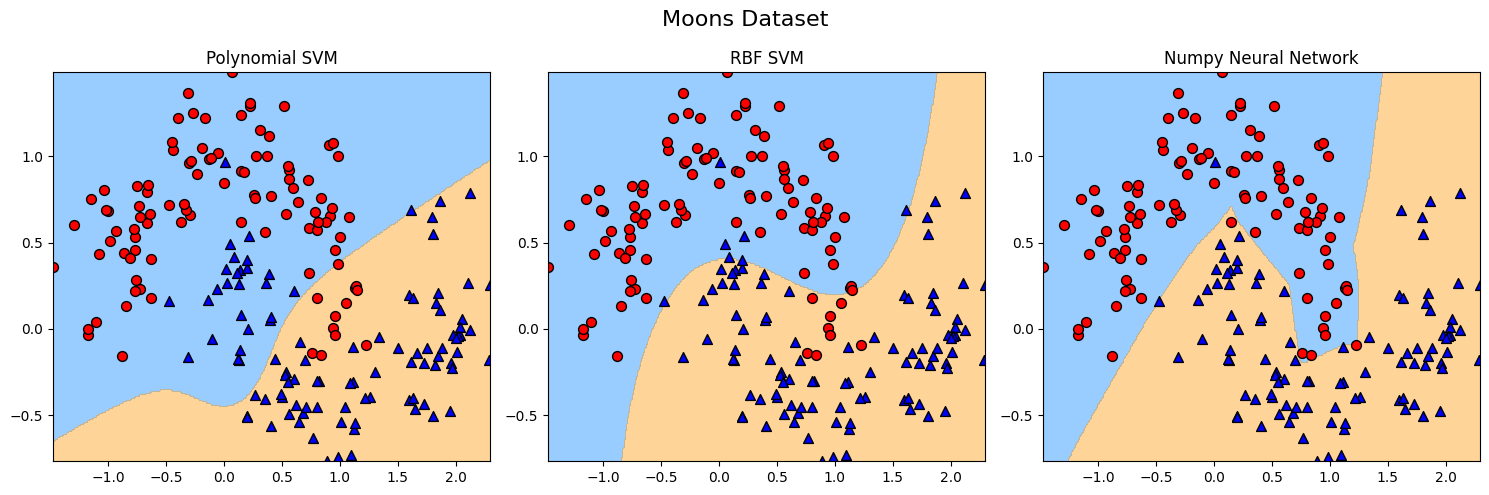

In [44]:
# Create SVM classifiers with different kernels
classifiers = {
    'Polynomial SVM': SVC(kernel='poly', degree=3, gamma='auto'),
    'RBF SVM': SVC(kernel='rbf', gamma='auto'),
    'Numpy Neural Network': NumpyNeuralNetwork()
}
# Generate and fit to make_circles dataset
X_circles, y_circles = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=42)
fit_and_plot(X_circles, y_circles, "Circles", classifiers)

# Create SVM classifiers with different kernels
classifiers = {
    'Polynomial SVM': SVC(kernel='poly', degree=3, gamma='auto'),
    'RBF SVM': SVC(kernel='rbf', gamma='auto'),
    'Numpy Neural Network': NumpyNeuralNetwork()
}
# Generate and fit to make_moons dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=42)
fit_and_plot(X_moons, y_moons, "Moons", classifiers)